In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df_test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
df_greeks=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
df_submit = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')
df_train.head()

In [10]:
df_test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_submit

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [12]:
#check class counts
target_column = 'Class'
target_count = df_train['Class'].value_counts()
print(target_count)

0    509
1    108
Name: Class, dtype: int64


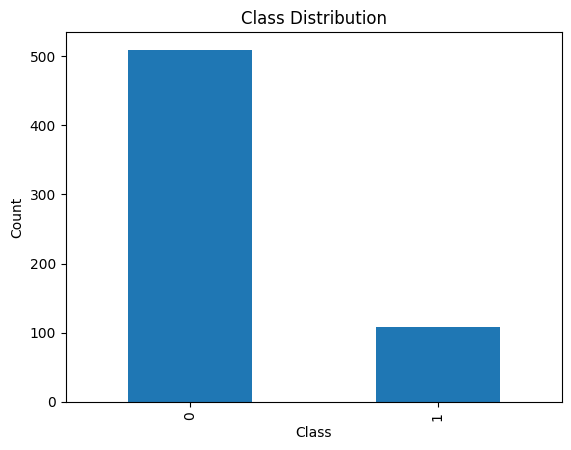

In [13]:
import matplotlib.pyplot as plt
target_count.plot(kind='bar')
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [14]:
#check missing values
missing_value = df_train.isnull().sum()
total_missing_value = df_train.isnull().sum().sum()
column_missing_value = missing_value[missing_value>0]
print(column_missing_value)
print(f'total missing value {total_missing_value}')

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64
total missing value 131


In [15]:
missing_value_by_class = df_train.groupby(target_column).apply(lambda x: x.isnull().sum()[x.isnull().sum()>0])

print(missing_value_by_class )

Class    
0      BQ    60
       CB     2
       CC     2
       DU     1
       EL    54
       FL     1
       FS     1
       GL     1
1      CC     1
       EL     6
       FC     1
       FS     1
dtype: int64


In [16]:
#handle categorical column for both train and test dataset
df_train['EJ'] = df_train['EJ'].replace({'A':0, 'B':1})
df_test['EJ'] = df_test['EJ'].replace({'A':0, 'B':1})
print(df_train['EJ'])

0      1
1      0
2      1
3      1
4      1
      ..
612    0
613    1
614    0
615    1
616    0
Name: EJ, Length: 617, dtype: int64


In [17]:
train = df_train.drop(df_train.columns[0], axis=1)
train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [18]:
test1=df_test.drop('Id',axis=1)
test1

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y = train['Class']
y = y.values
X = train.drop(columns='Class')
X.shape

(617, 56)

In [21]:
X=X.fillna(np.nan)
test1=test1.fillna(np.nan)

In [20]:
y.shape

(617,)

#Apply median on undersampled class 1

In [22]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

X_imputed = imputer.fit_transform(X)
test1_imputed = imputer.transform(test1)

In [23]:
X=np.array(X_imputed)
test1=np.array(test1_imputed)
X

array([[2.09377000e-01, 3.10903329e+03, 8.52001470e+01, ...,
        2.21362290e+01, 6.98349440e+01, 1.20342857e-01],
       [1.45282000e-01, 9.78764160e+02, 8.52001470e+01, ...,
        2.91354300e+01, 3.21319960e+01, 2.19780000e+01],
       [4.70030000e-01, 2.63510654e+03, 8.52001470e+01, ...,
        2.80228510e+01, 3.51926760e+01, 1.96941176e-01],
       ...,
       [4.27300000e-01, 2.45910720e+03, 1.30138587e+02, ...,
        2.61660720e+01, 1.19559420e+02, 2.19780000e+01],
       [3.63205000e-01, 1.26353524e+03, 8.52001470e+01, ...,
        2.51167500e+01, 3.71551120e+01, 1.84621622e-01],
       [4.82849000e-01, 2.67253426e+03, 5.46663930e+02, ...,
        4.57459740e+01, 1.14842372e+02, 2.19780000e+01]])

In [24]:
test1_imputed.shape

(5, 56)

In [ ]:
y.shape

In [25]:
#Split the train dataset into train & test datasets in a ration 75:25
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42, shuffle = True, stratify = y)

print(X_train.shape)
print(X_test.shape)

(493, 56)
(124, 56)


Class=0, n=407 (50.000%)
Class=1, n=407 (50.000%)


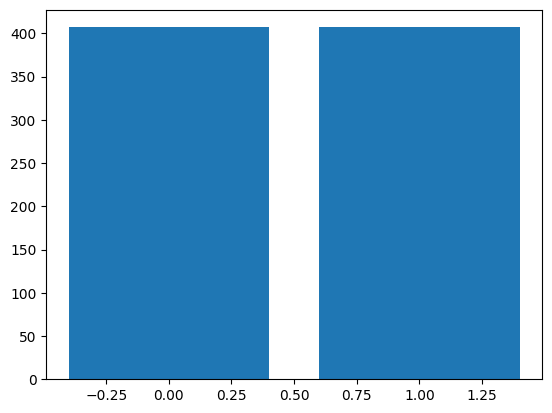

In [26]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = RandomOverSampler(random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

#now for the scaling
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_test.shape

(124, 56)

In [ ]:
#Classifers

# KNN

In [29]:
from scipy.spatial.distance import hamming
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#GridSearch to get best tuned parameters
tuned_parameters = [{'n_neighbors': [3,4,5,6,7,8,9,10],
                      'metric':['hamming', 'manhattan', 'euclidean']}]

knn_model = GridSearchCV(estimator=KNeighborsClassifier(weights='uniform'),
                         param_grid=tuned_parameters,
                         refit=True,
                         cv=4,
                         n_jobs=None,
                         scoring='f1')

knn_model.fit(X_train, y_train)

print('Best F1 score: %.2f%%' % (knn_model.best_score_*100))
print('Best Params:', knn_model.best_params_)

In [35]:
#classifier model run
knn_model = KNeighborsClassifier(weights = 'uniform',n_neighbors=3, metric='hamming')
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Accuracy score: %.2f%%' % accuracy)

Accuracy score: 77.42%


In [36]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

8.138889474961937

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [39]:
#Evaluation metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = knn_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[94  8]
 [20  2]]

Accuracy: 0.7741935483870968
Precision: 0.2
Recall: 0.09090909090909091
F1-Score: 0.12500000000000003
ROC-AUC: 0.6158645276292335

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.20      0.09      0.13        22

    accuracy                           0.77       124
   macro avg       0.51      0.51      0.50       124
weighted avg       0.71      0.77      0.74       124



# Regression

In [ ]:
X_train_scaled.shape

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000, solver='liblinear',random_state=42, penalty="l1")
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: %.2f%%' % accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy score: 0.90%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       102
           1       0.63      1.00      0.77        22

    accuracy                           0.90       124
   macro avg       0.81      0.94      0.85       124
weighted avg       0.93      0.90      0.90       124



In [43]:
#evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = log_reg.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[89 13]
 [ 0 22]]

Accuracy: 0.8951612903225806
Precision: 0.6285714285714286
Recall: 1.0
F1-Score: 0.7719298245614035
ROC-AUC: 0.9670231729055258

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       102
           1       0.63      1.00      0.77        22

    accuracy                           0.90       124
   macro avg       0.81      0.94      0.85       124
weighted avg       0.93      0.90      0.90       124



In [44]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

3.7787701133751854

# Catboost

In [45]:
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

ModuleNotFoundError: ignored

In [ ]:
#class weight assigned
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

#cat boost classifier
catboost = CatBoostClassifier(random_state=42)


tuned_parameters = {'learning_rate': [0.01, 0.1],
                    'depth': [3,6,9],
                    'iterations': [100,200,300]}


grid_search = GridSearchCV(estimator=catboost, param_grid= tuned_parameters, cv=5, n_jobs=None, scoring='f1')
grid_search.fit(X_train_scaled, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best F1-score: {:.2f}%".format(grid_search.best_score_ * 100))


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))


In [47]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [48]:
#classifer with tuned parameters
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(depth=6,iterations=200, learning_rate=0.1, random_state=42)
catboost_model.fit(X_train_scaled, y_train)

y_pred = catboost_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

0:	learn: 0.6006428	total: 60.2ms	remaining: 12s
1:	learn: 0.4993309	total: 71.1ms	remaining: 7.04s
2:	learn: 0.4466512	total: 81.4ms	remaining: 5.34s
3:	learn: 0.3811472	total: 99.6ms	remaining: 4.88s
4:	learn: 0.3323776	total: 110ms	remaining: 4.29s
5:	learn: 0.3004257	total: 120ms	remaining: 3.89s
6:	learn: 0.2657201	total: 132ms	remaining: 3.65s
7:	learn: 0.2377561	total: 143ms	remaining: 3.42s
8:	learn: 0.2139564	total: 153ms	remaining: 3.24s
9:	learn: 0.1977674	total: 163ms	remaining: 3.09s
10:	learn: 0.1816015	total: 174ms	remaining: 3s
11:	learn: 0.1654735	total: 184ms	remaining: 2.89s
12:	learn: 0.1541999	total: 195ms	remaining: 2.81s
13:	learn: 0.1464911	total: 206ms	remaining: 2.74s
14:	learn: 0.1378767	total: 217ms	remaining: 2.67s
15:	learn: 0.1296282	total: 227ms	remaining: 2.61s
16:	learn: 0.1216841	total: 238ms	remaining: 2.56s
17:	learn: 0.1168708	total: 254ms	remaining: 2.56s
18:	learn: 0.1114434	total: 268ms	remaining: 2.55s
19:	learn: 0.1062556	total: 277ms	remainin

In [49]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = catboost_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[99  3]
 [ 6 16]]

Accuracy: 0.9274193548387096
Precision: 0.8421052631578947
Recall: 0.7272727272727273
F1-Score: 0.7804878048780488
ROC-AUC: 0.9656862745098039

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.84      0.73      0.78        22

    accuracy                           0.93       124
   macro avg       0.89      0.85      0.87       124
weighted avg       0.92      0.93      0.93       124



In [50]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.6160716169520515

# Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


In [ ]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

tuned_parameters = [{'max_depth': [ 3,4,5,6],
                     'n_estimators': [200, 300,400,500],
                     'learning_rate': [0.01, 0.1, 0.001]}]

gs = GridSearchCV(estimator=GradientBoostingClassifier(random_state=121),
                  param_grid=tuned_parameters,
                  refit=True,
                  cv=5,
                  n_jobs=None,
                  scoring='f1')

gs.fit(X_train_scaled, y_train)

print('Best F1 score: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

In [52]:
#classifier with tuned parameters
gs_model = GradientBoostingClassifier(random_state=121, learning_rate=0.1, max_depth=3, n_estimators=400)
gs_model.fit(X_train_scaled, y_train)
y_pred_test = gs_model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_pred_test)

print("F1 score on Test Set: %.2f%%" % (f1_test*100))

F1 score on Test Set: 76.19%


In [53]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = gs_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, gs_model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[98  4]
 [ 6 16]]

Accuracy: 0.9193548387096774
Precision: 0.8
Recall: 0.7272727272727273
F1-Score: 0.761904761904762
ROC-AUC: 0.964349376114082

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.80      0.73      0.76        22

    accuracy                           0.92       124
   macro avg       0.87      0.84      0.86       124
weighted avg       0.92      0.92      0.92       124



In [54]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.906746241057835

# XGBoost

In [55]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [56]:
#classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 92.74%


In [57]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = xgb_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[99  3]
 [ 6 16]]

Accuracy: 0.9274193548387096
Precision: 0.8421052631578947
Recall: 0.7272727272727273
F1-Score: 0.7804878048780488
ROC-AUC: 0.9688057040998218

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.84      0.73      0.78        22

    accuracy                           0.93       124
   macro avg       0.89      0.85      0.87       124
weighted avg       0.92      0.93      0.93       124



In [58]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.6160716169520515

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [ ]:
dt = DecisionTreeClassifier()

tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,7,8,9],
    'min_samples_split': [2, 3,5,8, 10],
    'min_samples_leaf': [1, 2, 4,5,7,8,10]
}

grid_search = GridSearchCV(estimator= dt, param_grid= tuned_parameters, cv=5, n_jobs=None, scoring='accuracy')
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [60]:
tree = DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split= 3, criterion='entropy', random_state=42)
tree.fit(X_train_scaled, y_train)

y_pred = tree.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.90%


In [61]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = tree.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, tree.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[93  9]
 [ 6 16]]

Accuracy: 0.8790322580645161
Precision: 0.64
Recall: 0.7272727272727273
F1-Score: 0.6808510638297872
ROC-AUC: 0.8195187165775402

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.64      0.73      0.68        22

    accuracy                           0.88       124
   macro avg       0.79      0.82      0.80       124
weighted avg       0.89      0.88      0.88       124



In [62]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

4.360119361586753

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

tuned_parameters = {'n_estimators': [50, 100,200, 300],
                    'max_depth': [3,5,10, 20],
                    'min_samples_split': [5, 10, 15, 20],
                    'min_samples_leaf': [1, 2, 4, 5, 8]}


grid_search = GridSearchCV(estimator=rf_model, param_grid= tuned_parameters, cv=5, n_jobs=None, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


In [64]:
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf= 1,min_samples_split= 5, n_estimators= 200, random_state=123)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.88      0.64      0.74        22

    accuracy                           0.92       124
   macro avg       0.90      0.81      0.84       124
weighted avg       0.92      0.92      0.91       124



In [65]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = rf_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[100   2]
 [  8  14]]

Accuracy: 0.9193548387096774
Precision: 0.875
Recall: 0.6363636363636364
F1-Score: 0.7368421052631579
ROC-AUC: 0.9679144385026738

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.88      0.64      0.74        22

    accuracy                           0.92       124
   macro avg       0.90      0.81      0.84       124
weighted avg       0.92      0.92      0.91       124



In [66]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.9067462410578346

3.255555789984775

# Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier

In [69]:
#bagging with gradident boost
bagging_gs = BaggingClassifier(gs_model,
                               n_estimators=100,
                               max_samples=0.6,
                               max_features=0.5,
                               bootstrap=False,
                               random_state=42)

bagging_gs.fit(X_train_scaled, y_train)
y_pred = bagging_gs.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 93.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.85      0.77      0.81        22

    accuracy                           0.94       124
   macro avg       0.90      0.87      0.89       124
weighted avg       0.93      0.94      0.93       124



In [70]:
#bagging with gradident boost
bagging_rf = BaggingClassifier(rf_model,
                               n_estimators=100,
                               max_samples=0.6,
                               max_features=0.5,
                               bootstrap=False,
                               random_state=42)

bagging_rf.fit(X_train_scaled, y_train)
y_pred = bagging_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 92.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.84      0.73      0.78        22

    accuracy                           0.93       124
   macro avg       0.89      0.85      0.87       124
weighted avg       0.92      0.93      0.93       124



In [71]:
#bagging with catboost
bagging_cat = BaggingClassifier(catboost_model,
                                n_estimators=100,
                                max_samples=0.8,
                                max_features=0.5,
                                bootstrap=False,
                                random_state=42)


bagging_cat.fit(X_train_scaled, y_train)
y_pred = bagging_cat.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Streaming output truncated to the last 5000 lines.
11:	learn: 0.1909845	total: 67.7ms	remaining: 1.06s
12:	learn: 0.1735618	total: 73.4ms	remaining: 1.05s
13:	learn: 0.1596498	total: 78.8ms	remaining: 1.05s
14:	learn: 0.1516554	total: 84.2ms	remaining: 1.04s
15:	learn: 0.1440651	total: 98.7ms	remaining: 1.14s
16:	learn: 0.1366254	total: 108ms	remaining: 1.16s
17:	learn: 0.1308647	total: 113ms	remaining: 1.15s
18:	learn: 0.1243213	total: 119ms	remaining: 1.13s
19:	learn: 0.1199598	total: 125ms	remaining: 1.12s
20:	learn: 0.1128964	total: 130ms	remaining: 1.11s
21:	learn: 0.1053546	total: 135ms	remaining: 1.09s
22:	learn: 0.0994505	total: 140ms	remaining: 1.08s
23:	learn: 0.0955411	total: 146ms	remaining: 1.07s
24:	learn: 0.0924740	total: 151ms	remaining: 1.06s
25:	learn: 0.0887952	total: 157ms	remaining: 1.05s
26:	learn: 0.0842063	total: 163ms	remaining: 1.04s
27:	learn: 0.0815398	total: 169ms	remaining: 1.04s
28:	learn: 0.0777203	total: 174ms	remaining: 1.03s
29:	learn: 0.0741382	total

In [72]:
#Bagging with xgboost
bagging_xgb = BaggingClassifier(xgb_model,
                                n_estimators=100,
                                max_samples=0.8,
                                max_features=0.5,
                                bootstrap=False,
                                random_state=42)


bagging_xgb.fit(X_train_scaled, y_train)
y_pred = bagging_xgb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 92.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.88      0.68      0.77        22

    accuracy                           0.93       124
   macro avg       0.91      0.83      0.86       124
weighted avg       0.93      0.93      0.92       124



In [73]:
#evaluation metrics for best one (catboost)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = bagging_cat.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, bagging_cat.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[100   2]
 [  5  17]]

Accuracy: 0.9435483870967742
Precision: 0.8947368421052632
Recall: 0.7727272727272727
F1-Score: 0.8292682926829269
ROC-AUC: 0.9621212121212122

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.89      0.77      0.83        22

    accuracy                           0.94       124
   macro avg       0.92      0.88      0.90       124
weighted avg       0.94      0.94      0.94       124



In [74]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.0347223687404847

# Majority Voting

In [75]:
from sklearn.ensemble import VotingClassifier

In [76]:
#base models

# clf1 = tree
clf2 = rf_model
clf3 = catboost_model
clf4 = xgb_model
# clf5 = bagging_cat
clf6 = bagging_gs
clf7 = bagging_cat
clf8 = bagging_xgb

voting_classifier = VotingClassifier(
    estimators=[('rf', clf2), ('cat', clf3), ('xgb', clf4),('bg_gs', clf6), ('bg_cat', clf7), ('bg1_xgb', clf8)],
    voting='soft'
)

voting_classifier.fit(X_train_scaled, y_train)
y_pred = voting_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Streaming output truncated to the last 5000 lines.
11:	learn: 0.1909845	total: 77.1ms	remaining: 1.21s
12:	learn: 0.1735618	total: 82.5ms	remaining: 1.19s
13:	learn: 0.1596498	total: 87.6ms	remaining: 1.16s
14:	learn: 0.1516554	total: 93.3ms	remaining: 1.15s
15:	learn: 0.1440651	total: 99ms	remaining: 1.14s
16:	learn: 0.1366254	total: 105ms	remaining: 1.13s
17:	learn: 0.1308647	total: 111ms	remaining: 1.12s
18:	learn: 0.1243213	total: 116ms	remaining: 1.11s
19:	learn: 0.1199598	total: 122ms	remaining: 1.1s
20:	learn: 0.1128964	total: 127ms	remaining: 1.09s
21:	learn: 0.1053546	total: 133ms	remaining: 1.08s
22:	learn: 0.0994505	total: 139ms	remaining: 1.07s
23:	learn: 0.0955411	total: 144ms	remaining: 1.06s
24:	learn: 0.0924740	total: 150ms	remaining: 1.05s
25:	learn: 0.0887952	total: 155ms	remaining: 1.04s
26:	learn: 0.0842063	total: 160ms	remaining: 1.03s
27:	learn: 0.0815398	total: 166ms	remaining: 1.02s
28:	learn: 0.0777203	total: 171ms	remaining: 1.01s
29:	learn: 0.0741382	total: 1

In [77]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = voting_classifier.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, voting_classifier.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[99  3]
 [ 6 16]]

Accuracy: 0.9274193548387096
Precision: 0.8421052631578947
Recall: 0.7272727272727273
F1-Score: 0.7804878048780488
ROC-AUC: 0.9656862745098038

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.84      0.73      0.78        22

    accuracy                           0.93       124
   macro avg       0.89      0.85      0.87       124
weighted avg       0.92      0.93      0.93       124



In [78]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.6160716169520515

In [ ]:
X_test.shape

# Stack

In [81]:
from sklearn.ensemble import StackingClassifier


rf = rf_model

xgb = xgb_model

catboost = catboost_model

gb_boost = bagging_cat

lg_classifier = log_reg

#stacking classifier

estimators = [('rf', rf),
              ('xgb', xgb),
              ('cat', catboost),
              ('gb', gb_boost)]

stacking = StackingClassifier(estimators=estimators,
                              final_estimator=lg_classifier,
                              cv=4)

rf.fit(X_train_scaled, y_train)
print(f"Random forest model training Accuracy: {rf.score(X_train_scaled, y_train):0.2f}")
print(f"Random forest model test Accuracy: {rf.score(X_test_scaled, y_test):0.2f}")

xgb.fit(X_train_scaled, y_train)
print(f"\nXGBoost model training Accuracy: {xgb.score(X_train_scaled, y_train):0.2f}")
print(f"XGBoost model test Accuracy: {xgb.score(X_test_scaled, y_test):0.2f}")


gb_boost.fit(X_train_scaled, y_train)
print(f"\nCatBoost model training Accuracy: {gb_boost.score(X_train_scaled, y_train):0.2f}")
print(f"CatBoost model test Accuracy: {gb_boost.score(X_test_scaled, y_test):0.2f}")

catboost.fit(X_train_scaled, y_train)
print(f"\nCatBoost model training Accuracy: {catboost.score(X_train_scaled, y_train):0.2f}")
print(f"CatBoost model test Accuracy: {catboost.score(X_test_scaled, y_test):0.2f}")

stacking.fit(X_train_scaled, y_train)
print(f"\nStacking classifier training Accuracy: {stacking.score(X_train_scaled, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {stacking.score(X_test_scaled, y_test):0.2f}")

Streaming output truncated to the last 5000 lines.
3:	learn: 0.4039969	total: 18.7ms	remaining: 917ms
4:	learn: 0.3569876	total: 23.5ms	remaining: 916ms
5:	learn: 0.3144826	total: 28.5ms	remaining: 921ms
6:	learn: 0.2852108	total: 33.5ms	remaining: 923ms
7:	learn: 0.2523073	total: 45.3ms	remaining: 1.09s
8:	learn: 0.2328685	total: 51.8ms	remaining: 1.1s
9:	learn: 0.2144841	total: 56.5ms	remaining: 1.07s
10:	learn: 0.1997428	total: 61ms	remaining: 1.05s
11:	learn: 0.1909289	total: 65.4ms	remaining: 1.02s
12:	learn: 0.1721066	total: 70.2ms	remaining: 1.01s
13:	learn: 0.1597750	total: 74.4ms	remaining: 988ms
14:	learn: 0.1510743	total: 79.3ms	remaining: 978ms
15:	learn: 0.1437518	total: 86ms	remaining: 989ms
16:	learn: 0.1334512	total: 90.7ms	remaining: 976ms
17:	learn: 0.1255243	total: 95.4ms	remaining: 965ms
18:	learn: 0.1184743	total: 101ms	remaining: 965ms
19:	learn: 0.1133024	total: 106ms	remaining: 955ms
20:	learn: 0.1081482	total: 111ms	remaining: 947ms
21:	learn: 0.1043520	total: 

In [82]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

y_pred = stacking.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, stacking.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[100   2]
 [  8  14]]

Accuracy: 0.9193548387096774
Precision: 0.875
Recall: 0.6363636363636364
F1-Score: 0.7368421052631579
ROC-AUC: 0.964795008912656

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.88      0.64      0.74        22

    accuracy                           0.92       124
   macro avg       0.90      0.81      0.84       124
weighted avg       0.92      0.92      0.91       124



In [83]:
#log loss calculation
from sklearn.metrics import log_loss

def balance_logloss(y_test, y_pred):
    logloss_positive = log_loss(y_test, y_pred)
    logloss_negative = log_loss(1 - y_test, 1-y_pred)
    balance_logloss = (logloss_positive + logloss_negative)/2.0

    return balance_logloss

balance_logloss(y_test, y_pred)

2.9067462410578346

##### The best result of bagging with catboost is used for predicting the provided submit-test for the competition submission

In [84]:
test_preds = bagging_cat.predict_proba(test1)
test_preds

array([[0.19574092, 0.80425908],
       [0.19574092, 0.80425908],
       [0.19574092, 0.80425908],
       [0.19574092, 0.80425908],
       [0.19574092, 0.80425908]])

In [85]:

submit = pd.DataFrame({'Id':df_test['Id'], 'class_0': test_preds[:, 0], 'class_1': test_preds[:, 1]})
submit

,Id,class_0,class_1
0,00eed32682bb,0.195741,0.804259
1,010ebe33f668,0.195741,0.804259
2,02fa521e1838,0.195741,0.804259
3,040e15f562a2,0.195741,0.804259
4,046e85c7cc7f,0.195741,0.804259


In [ ]:
submit.to_csv('/kaggle/working/submission.csv', index=False)
submit=pd.read_csv("/kaggle/working/submission.csv")
submit.head()